<a href="https://colab.research.google.com/github/SeanCullen11/crop_differences_demo/blob/master/auto_crop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from tkinter import filedialog
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square
from skimage.color import label2rgb
from matplotlib import image
import cv2
from PIL import Image
import csv
import numpy
from skimage import io

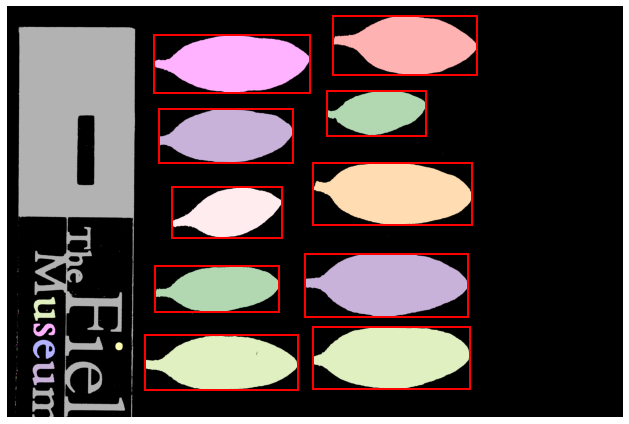

Saved File: sampeimage_AUTOCROP_1.jpg
Saved File: sampeimage_AUTOCROP_2.jpg
Saved File: sampeimage_AUTOCROP_3.jpg
Saved File: sampeimage_AUTOCROP_4.jpg
Saved File: sampeimage_AUTOCROP_5.jpg
Saved File: sampeimage_AUTOCROP_6.jpg
Saved File: sampeimage_AUTOCROP_7.jpg
Saved File: sampeimage_AUTOCROP_8.jpg
Saved File: sampeimage_AUTOCROP_9.jpg
Saved File: sampeimage_AUTOCROP_10.jpg


In [10]:

# Local variables to help set the x and y axies and declare the list
x1 = 0
y1 = 0
list = []


def main():
    img = image.imread(img_thresh())
    segment_image(img)


def segment_image(img):

    # apply threshold
    thresh = threshold_otsu(img)
    bw = closing(img > thresh, square(5))

    # remove artifacts connected to image border
    cleared = clear_border(bw)

    # label image regions
    label_image = label(cleared)

    # to make the background transparent, pass the value of `bg_label`,
    # and leave `bg_color` as `None` and `kind` as `overlay`
    image_label_overlay = label2rgb(label_image, image=img, bg_label=0)

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.imshow(image_label_overlay)

    for region in regionprops(label_image):
        # take regions with large enough areas
        if region.area >= 8000: # and region.area < 1500000: # temp fix

            # Set the length and height of each box to help filer out unwanted segments
            minr, minc, maxr, maxc = region.bbox
            length = (maxr - minr)
            width = (maxc - minc)

            # Only draw boxes around segments to the right 1000 pixels and that are wider than long
            # This helps us not segment out parts of the ruler in or image that mess with our data
            if minc > 1000 and length < width:

                # draw rectangle around segmented leaves
                rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                      fill=False, edgecolor='red', linewidth=2)
                ax.add_patch(rect)

                # Add values to a list
                list.append(minc)
                list.append(minr)
                list.append(maxc)
                list.append(maxr)

    # Show image with regions outlined
    ax.set_axis_off()
    plt.tight_layout()
    plt.show()
    # print(list)

    # Execute the crop function to crop the highlighted regions
    crop()


def crop():
    global count

    count = 0
    runs = 0

    # Run through the list of stored x and y values
    for item in list:
        while count < (len(list) - 3):
            x1 = list[count]
            x2 = list[count + 1]
            y1 = list[count + 2]
            y2 = list[count + 3]

            # Open original image and crop using our
            # coordinates we selected with slight padding
            img_crop = Image.open('/content/sampeimage.jpg')
            img_crop_res = img_crop.crop((x1 - 10, x2 - 10, y1 + 10, y2 + 10))

            # Increment count and runs
            count += 4
            runs += 1

            # Save cropped image and cropped image file name
            saved_file = 'sampeimage_' + 'AUTOCROP' + '_' + str(runs) + '.jpg'
            img_crop_res.save('sampeimage''_' + 'AUTOCROP' + '_' + str(runs) + '.jpg')

            # Print the file name and where it was saved
            print('Saved File: ' + saved_file)

            # convert image object into array
            imageinfo = numpy.asarray(img_crop_res)

            # Store the image height and width and new file location
            height = imageinfo.shape[0]
            width = imageinfo.shape[1]

# Threshold the image to be segmented
def img_thresh():

    # Load selected image
    image = cv2.imread('/content/sampeimage.jpg')

    # Convert image to grayscale
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # all pixels value above 200 will be set to 255
    ret, thresh2 = cv2.threshold(image, 200, 255, cv2.THRESH_BINARY_INV)

    # Save thresholded image and image name
    cv2.imwrite('sampeimage' + '_' + 'THRESH' + '.jpg', thresh2)
    imagename = 'sampeimage' + '_' + 'THRESH' + '.jpg'

    # print(imagename)
    return imagename


if __name__ == '__main__':
    filename = cv2.imread('/content/sampeimage.jpg')
    main()
    